# Deep Learning With PyTorch 14 - Convolutional Neural Net (CNN)

Make a CNN to work on CIFAR-10

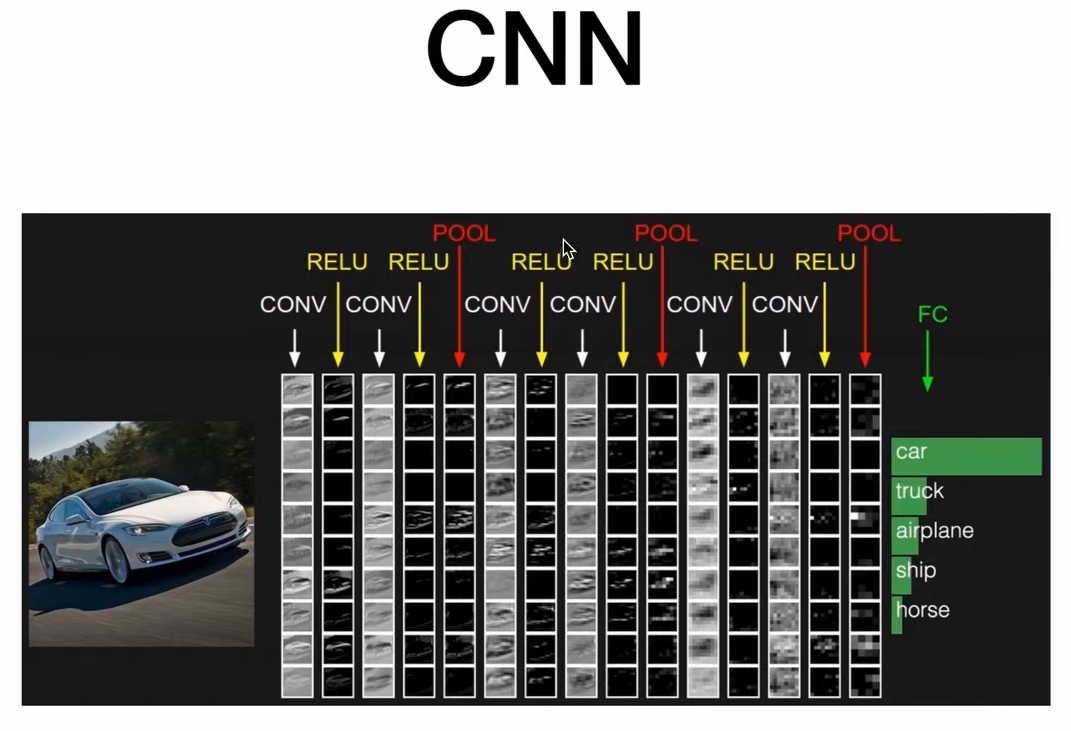

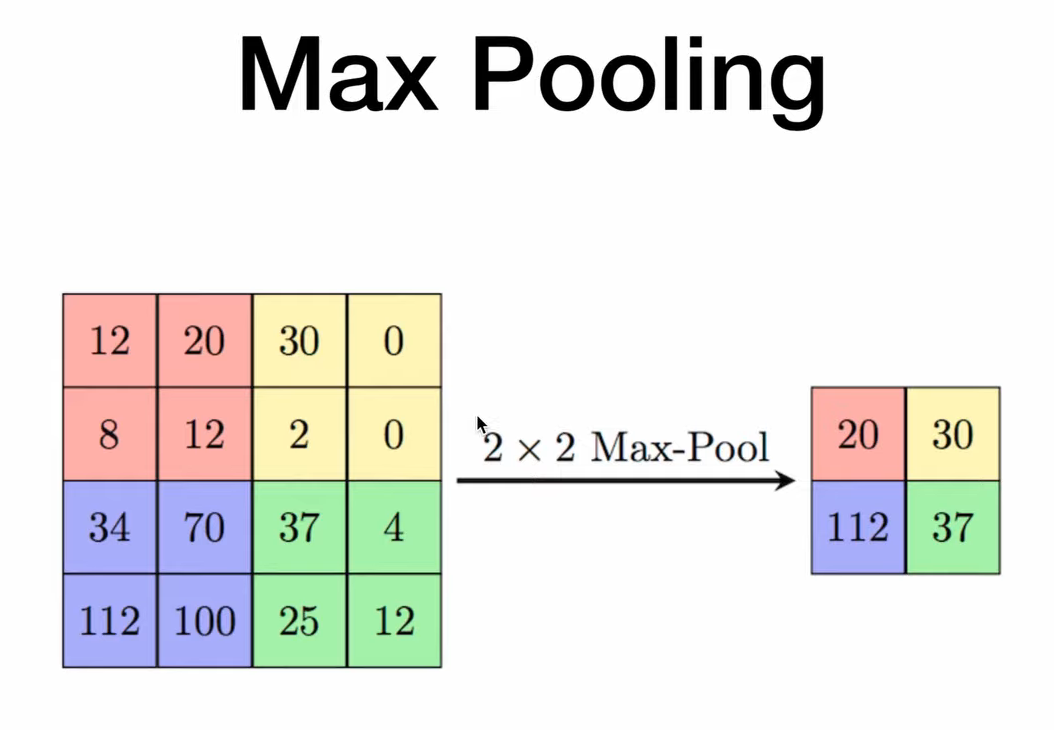

Max pooling - Filters regions down to subregions. Reduces size of image & avoids overfitting -> abstracts input

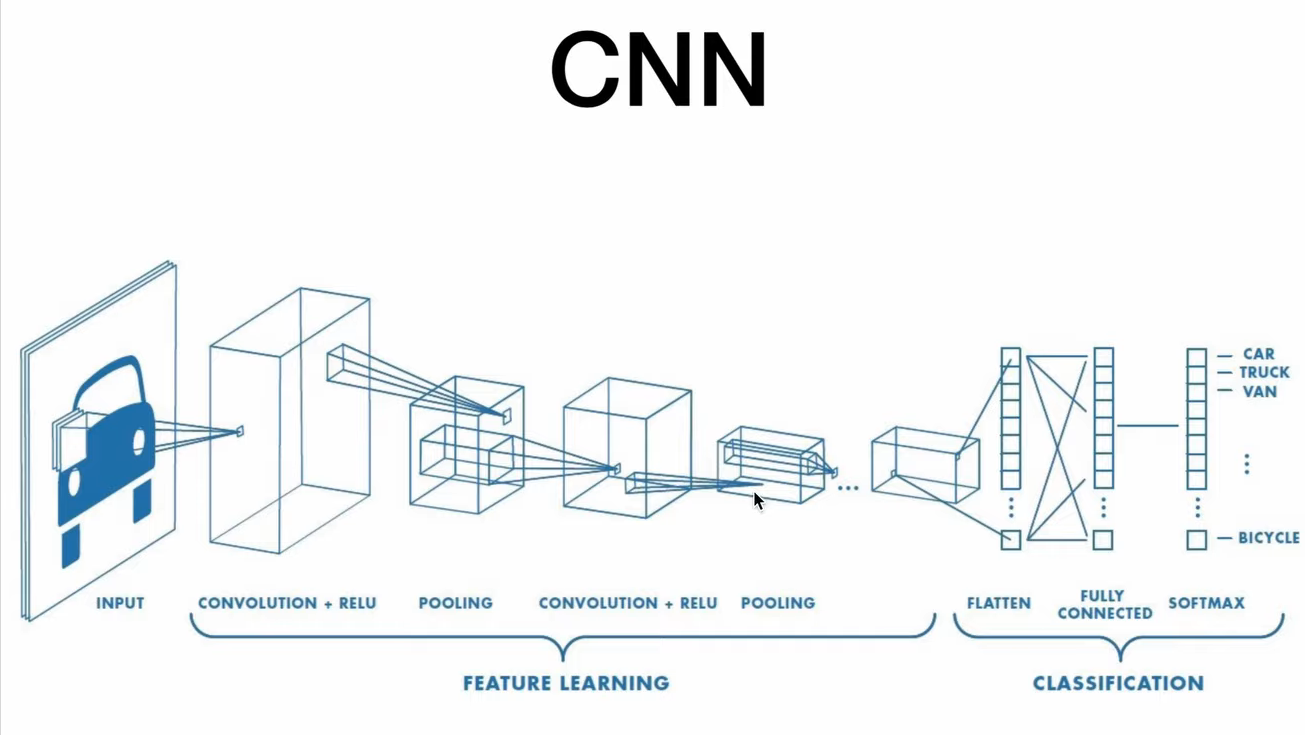

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# configutarion and hyper-parameters
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [3]:
# dataset has PILImage images of range [0, 1]
# transform them to tensors of normalized range [-1, 1]

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

Implement conv net

input dims for CNN: <br>
[# batches, # channels, Length, width]


In [5]:
class ConvNet(nn.Module):
    def __init__(self):
        # input channel size = 3 (3 color channels)
        # output channel size = 6
        # kernel size = 5
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # linear input size: 
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [6]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print(f"epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")

epoch 1 / 4, step 2000/12500, loss = 2.2785
epoch 1 / 4, step 4000/12500, loss = 2.3047
epoch 1 / 4, step 6000/12500, loss = 2.3040
epoch 1 / 4, step 8000/12500, loss = 2.2886
epoch 1 / 4, step 10000/12500, loss = 2.1613
epoch 1 / 4, step 12000/12500, loss = 2.0153
epoch 2 / 4, step 2000/12500, loss = 2.0593
epoch 2 / 4, step 4000/12500, loss = 2.0657
epoch 2 / 4, step 6000/12500, loss = 2.0482
epoch 2 / 4, step 8000/12500, loss = 1.4342
epoch 2 / 4, step 10000/12500, loss = 1.6792
epoch 2 / 4, step 12000/12500, loss = 1.4996
epoch 3 / 4, step 2000/12500, loss = 1.5047
epoch 3 / 4, step 4000/12500, loss = 1.7948
epoch 3 / 4, step 6000/12500, loss = 1.3360
epoch 3 / 4, step 8000/12500, loss = 1.4890
epoch 3 / 4, step 10000/12500, loss = 0.6421
epoch 3 / 4, step 12000/12500, loss = 2.1106
epoch 4 / 4, step 2000/12500, loss = 1.4652
epoch 4 / 4, step 4000/12500, loss = 0.9781
epoch 4 / 4, step 6000/12500, loss = 1.6438
epoch 4 / 4, step 8000/12500, loss = 1.8722
epoch 4 / 4, step 10000/12

In [7]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predictions[i]
            if (label==pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    #for i in range(10):
    acc = 100.0 * (n_correct / n_samples)
    print(f"accuracy of network = {acc}")
    
    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f"accuracy of {classes[i]} = {acc}")

accuracy of network = 47.12
accuracy of plane = 53.9
accuracy of car = 65.9
accuracy of bird = 42.5
accuracy of cat = 17.2
accuracy of deer = 31.8
accuracy of dog = 49.9
accuracy of frog = 49.5
accuracy of horse = 49.3
accuracy of ship = 52.5
accuracy of truck = 58.7
